- audience score & number of audience ratings

In [74]:
import pandas as pd
df = pd.read_csv('bestofrt.tsv', sep='\t')
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


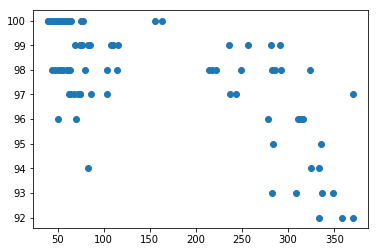

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.number_of_critic_ratings, df.critic_score)

### 1.  Web Scraping( HTML)
- The two main ways to work with HTML files are:

Saving the HTML file to your computer (using the Requests library for example) library and reading that file into a BeautifulSoup constructor<br>
Reading the HTML response content directly into a BeautifulSoup constructor-HTML parser (again using the Requests library for example)

In [11]:
import requests
url = "https://www.rottentomatoes.com/m/et_the_extraterrestrial"
response = requests.get(url)

# Frist wqy, Save HTML to file
with open("et_the_extraterrestria.html", mode='wb') as file:
    file.write(response.content)

In [12]:
# Second way, being done by not saving a file to the computer at all
# Work with HTML in memory
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content)

### 2. Extract the title from HTML file

In [23]:
from bs4 import BeautifulSoup


In [37]:
with open('rt_html/et_the_extraterrestrial.html', encoding="utf-8") as file:
    soup = BeautifulSoup(file)   # if there is a warning in there, put  (file, 'lxml')
soup.find('title')


<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [30]:
soup.title

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [33]:
soup.title.contents[0]         

'E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes'

In [35]:
soup.title.contents[0][:-len('- Rotten Tomatoes')]           

'E.T. The Extra-Terrestrial\xa0(1982) '

- xa0 - unicode of non-breaking space, TSV파일은 non-breaking space를 고려하지 않으므로 신경쓸필요 없다. regular space로 인식함.

#### If I download all 100 files, need to put this code in a loop. 

In [73]:
import os

df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html), encoding='utf-8') as file:
        soup = BeautifulSoup(file)
        #title
        title = soup.find('title').contents[0][:-len('- Rotten Tomatoes')]
        
        # <div class="audience-score meter">" 코드로 되어 있을 때
        # [:-1]  %표시 없앨때
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        
        # the number of audience ratings
        # <div class="audience-info hidden-xs superPageFontColor">
        #          <span class="subtle superPageFontColor"> Average Ratings </span> 코드로 되어 있을때
        div_num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        
        # div가 2개 있는데, 여기서 필요한 것은 user rating이므로(2번째)
        second_div_num_audience_ratings = div_num_audience_ratings.find_all('div')[1]
        # div contents는 여러개.
        div_content = div_num_audience_ratings.find_all('div')[1].contents
        # div contetns 중 마지막 index.
        num_audience_ratings = div_num_audience_ratings.find_all('div')[1].contents[2]
        int_type = num_audience_ratings.strip().replace(',','')
        
        print(title)
        print(audience_score)
        print(div_num_audience_ratings)
        print('------second div----------')
        print(second_div_num_audience_ratings)
        print('------div contents----------')
        print(div_content)
        print('------audience rating----------')
        print(num_audience_ratings)
        print(int_type)

        df_list.append({'title': title,
                       'audience_score' : audience_score,
                       'num_audience_ratings': num_audience_ratings,
                       'int type_ratings': int_type})
df = pd.DataFrame(df_list, columns=['title', 'audience_score', 'num_audience_ratings', 'int type_ratings'])
df

E.T. The Extra-Terrestrial (1982) 
72
<div class="audience-info hidden-xs superPageFontColor">
<div>
<span class="subtle superPageFontColor">Average Rating:</span>
            3.5/5
                </div>
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        32,313,030</div>
</div>
------second div----------
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        32,313,030</div>
------div contents----------
['\n', <span class="subtle superPageFontColor">User Ratings:</span>, '\n        32,313,030']
------audience rating----------

        32,313,030
32313030
Finding Nemo (2003) 
86
<div class="audience-info hidden-xs superPageFontColor">
<div>
<span class="subtle superPageFontColor">Average Rating:</span>
            3.8/5
                </div>
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        33,355,673</div>
</div>
------second div----------
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        33

,title,audience_score,num_audience_ratings,int type_ratings
0,E.T. The Extra-Terrestrial (1982),72,"32,313,030",32313030
1,Finding Nemo (2003),86,"33,355,673",33355673
2,The Godfather (1972),98,"730,433",730433


### 3. Downloading Files from the Internet - Requests: HTTP for Humans


In [90]:
import requests
import os

# if it doesn't exist already, a bit of codes creates the folder 'ebert-reviews : store the downloaded files'
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

- How you download one file.

In [91]:
   
# the actual bit of request code( = get())
# return value : <Response [200> means texts of contents are succeed.
url = 'https://2.python-requests.org//en/master/user/quickstart/#binary-response-content'
response = requests.get(url)

In [101]:
response.content

AttributeError: 'bytes' object has no attribute 'length'

In [96]:
# URL마지막의 (/다음)이름만 가져오기. "파일을 열어서 response변수에 쓸"(개념 이해!) 컨텐츠를 가져온다. 
# 이때 wb(wirte binary)로 연다. 왜냐하면 response.content는 byte형태이기 때문. text형태가 아님. 
# 나중에 pandas나 text에디터에서 이 파일을 열때, 이 byte는 읽을수 있는 text형태로 변환되기 때문에 걱정안해도 됨. 
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [94]:
# check the ebert_reviews folder.
os.listdir(folder_name)

['#binary-response-content']

- How you download lots of files 

In [89]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [99]:
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

os.listdir(folder_name)

['#binary-response-content',
 '1-the-wizard-of-oz-1939-film.txt',
 '10-metropolis-1927-film.txt',
 '100-battleship-potemkin.txt',
 '11-e.t.-the-extra-terrestrial.txt',
 '12-modern-times-film.txt',
 '14-singin-in-the-rain.txt',
 '15-boyhood-film.txt',
 '16-casablanca-film.txt',
 '17-moonlight-2016-film.txt',
 '18-psycho-1960-film.txt',
 '19-laura-1944-film.txt',
 '2-citizen-kane.txt',
 '20-nosferatu.txt',
 '21-snow-white-and-the-seven-dwarfs-1937-film.txt',
 '22-a-hard-day27s-night-film.txt',
 '23-la-grande-illusion.txt',
 '25-the-battle-of-algiers.txt',
 '26-dunkirk-2017-film.txt',
 '27-the-maltese-falcon-1941-film.txt',
 '29-12-years-a-slave-film.txt',
 '3-the-third-man.txt',
 '30-gravity-2013-film.txt',
 '31-sunset-boulevard-film.txt',
 '32-king-kong-1933-film.txt',
 '33-spotlight-film.txt',
 '34-the-adventures-of-robin-hood.txt',
 '35-rashomon.txt',
 '36-rear-window.txt',
 '37-selma-film.txt',
 '38-taxi-driver.txt',
 '39-toy-story-3.txt',
 '4-get-out-film.txt',
 '40-argo-2012-film.t

- Solution Test<br>
Run the cell below the see if your solution is correct. If an AssertionError is thrown, your solution is incorrect. If no error is thrown, your solution is correct.

In [109]:
folder_name = 'ebert_reviews_solution'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [112]:
import filecmp
dc = filecmp.dircmp('ebert_reviews', 'ebert_reviews_solution')
#총 88개의 파일이 있는지 체크
assert len(dc.common) == 88

AssertionError: 

### Text file in Python

In [114]:
# Opening and reading the text files means storing the textdata in Pandas dataframe.
# There are two way
# 1. Using OS library : os.listdir 
# 2. Glob library : glob.glob(),  return:a list of pathname 
# glob : 유닉스 스타일의 경로명 확장자를 허용하는 라이브러리
# 리턴값이 list이므로 loop로 데이터 받아오기

In [123]:
import glob

for ebert_review in glob.glob('ebert_reviews/*.txt'):
    #print(ebert_review)
    
    with open(ebert_review, encoding='utf-8') as file:
        print(file.read())
        break

The Wizard of Oz (1939)
http://www.rogerebert.com/reviews/great-movie-the-wizard-of-oz-1939
As a child I simply did not notice whether a movie was in color or not. The movies themselves were such an overwhelming mystery that if they wanted to be in black and white, that was their business. It was not until I saw "The Wizard of Oz" for the first time that I consciously noticed B&W versus color, as Dorothy was blown out of Kansas and into Oz. What did I think? It made good sense to me.

The switch from black and white to color would have had a special resonance in 1939, when the movie was made. Almost all films were still being made in black and white, and the cumbersome new color cameras came with a “Technicolor consultant” from the factory, who stood next to the cinematographer and officiously suggested higher light levels. Shooting in color might have been indicated because the film was MGM's response to the huge success of Disney's pioneering color animated feature, "Snow White and t

In [159]:
import glob

df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        # [:-1] : 마지막 </n>를 없애고 보여줌.
        #print(file.readline()[:-1])
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text =file.read()
        df_list.append({'title' : title,
                  'review_url' : review_url,
                  'review_text': review_text})


In [160]:
import pandas as pd

df = pd.DataFrame(df_list, columns = ['title', 'review_url','review_text'])
df.head()

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Metropolis (1927),http://www.rogerebert.com/reviews/great-movie-...,The opening shots of the restored “Metropolis”...
2,Battleship Potemkin (1925),http://www.rogerebert.com/reviews/great-movie-...,"""The Battleship Potemkin” has been so famous f..."
3,E.T. The Extra-Terrestrial (1982),http://www.rogerebert.com/reviews/great-movie-...,Dear Raven and Emil:\n\nSunday we sat on the b...
4,Modern Times (1936),http://www.rogerebert.com/reviews/modern-times...,"A lot of movies are said to be timeless, but s..."


In [161]:
df_solution = pd.read_pickle('df_solution.pkl')
df.sort_values('title', inplace = True)
df.reset_index(inplace = True, drop = True)
df_solution.sort_values('title', inplace = True)
df_solution.reset_index(inplace = True, drop = True)
pd.testing.assert_frame_equal(df, df_solution)

### Image files in Python

- APIs and Access Libraies(MediaWiki, API of Wikipedia, 이미지 파일 가져오기)<br>

1) rtsimple : Rotten Tomatoes API - 코드가 꽤 이해가 어려우며 직관적이 아니므로 사용하지 않겠음<br>
import rtsimple as rt<br>
rt.API_KEY = 'YOUR API KEY HERE'<br>
movie = rt.Movies('10489')<br>
movie.ratings['audience_score']<br><br>
2) MediaWiki : Wikipedia API - wptools<br>      *conda prompt comand: pip install -U wptools<br>
•	Twitter API → tweepy

In [175]:
import wptools

url = 'https://en.wikipedia.org/wiki/Mahatma_Gandhi'
keyword = url.split('/')[-1]
keyword    #'Mahatma_Gandhi'
page = wptools.page(keyword)
# page객체의 get()는 페이지의 모든 이미지 등 페이지 내의 다양한 데이터를 가져오는 메소드
#page.get()
#각각의 페이지내의 데이터를 가져올때는 page.data['image']와 같이 data객체를 사용하여 가져온다. 아래 박스 참고

en.wikipedia.org (query) Mahatma_Gandhi
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Geor...
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Nati...
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Varg...
en.wikipedia.org (parse) 19379
www.wikidata.org (wikidata) Q1001
www.wikidata.org (labels) P1559|P1430|P800|P1576|P1953|P1280|Q944...
www.wikidata.org (labels) Q5137|P19|Q179126|Q15958642|P2188|P3762...
www.wikidata.org (labels) Q7243|P2850|P2966|Q16323111|P269|P570|P...
www.wikidata.org (labels) P3909|Q207826|P607|Q18814623|Q6419912|P...
www.wikidata.org (labels) P1842|P1411|P935|P2639|Q1775277|P1441|P...
en.wikipedia.org (restbase) /page/summary/Mahatma_Gandhi
en.wikipedia.org (imageinfo) File:Mahatma-Gandhi, studio, 1931.jp...
Mahatma Gandhi (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(12)> Mahatma Mohandas Karamchand Gandhi, M. K. Ga...
  assessments: <dict(10)> Biography, Politics, Alternative Views, ...
  claims: <dict(151

In [177]:
page.data['image']

[{'kind': 'query-pageimage',
  'file': 'File:Mahatma-Gandhi, studio, 1931.jpg',
  'orig': 'Mahatma-Gandhi,_studio,_1931.jpg',
  'timestamp': '2019-02-26T13:14:24Z',
  'size': 3250029,
  'width': 2620,
  'height': 3270,
  'url': 'https://upload.wikimedia.org/wikipedia/commons/7/7a/Mahatma-Gandhi%2C_studio%2C_1931.jpg',
  'descriptionurl': 'https://commons.wikimedia.org/wiki/File:Mahatma-Gandhi,_studio,_1931.jpg',
  'descriptionshorturl': 'https://commons.wikimedia.org/w/index.php?curid=76882768',
  'title': 'File:Mahatma-Gandhi, studio, 1931.jpg',
  'metadata': {'DateTime': {'value': '2019-02-26 13:14:24',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'ObjectName': {'value': 'Mahatma-Gandhi, studio, 1931',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'CommonsMetadataExtension': {'value': 1.2,
    'source': 'extension',
    'hidden': ''},
   'Categories': {'value': 'Files uploaded by Yann Forget|Mohandas K. Gandhi in 1931|Mohandas K. Gandhi in England|PD-1996|PD 

### 4. JSON files in Python
- JSON object : python dictionary
- JSON array : python list

In [5]:
import wptools
page = wptools.page('E.T._the_Extra-Terrestrial').get()

en.wikipedia.org (query) E.T._the_Extra-Terrestrial
en.wikipedia.org (parse) 73441
www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) Q65|P921|Q488645|Q787145|Q4834543|P462|...
www.wikidata.org (labels) Q506198|P674|Q457893|Q281939|Q739633|Q4...
www.wikidata.org (labels) P1970|Q21571487|Q45171911|P31|Q374540|P...
www.wikidata.org (labels) Q461742|Q103360|P3110|Q181508|Q354873|P...
en.wikipedia.org (restbase) /page/summary/E.T._the_Extra-Terrestrial
en.wikipedia.org (imageinfo) File:ET logo 3.svg|File:E t the extr...
E.T. the Extra-Terrestrial (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  claims: <dict(95)> P1562, P57, P272, P345, P31, P161, P373, P480...
  description: <str(63)> 1982 American science fiction film direct...
  exhtml: <str(570)> <p><i><b>E.T. the Extra-Terrestrial</b></i> i...
  exrest: <str(549)> E.T. the Extra-Terrestrial is a 1982 American...
  extext: <str(172

In [6]:
#Access the first image in the images attribute, which is a JSON array.
page.data['image'][0]

{'kind': 'parse-image',
 'file': 'File:E t the extra terrestrial ver3.jpg',
 'orig': 'E t the extra terrestrial ver3.jpg',
 'timestamp': '2016-06-04T10:30:46Z',
 'size': 83073,
 'width': 253,
 'height': 394,
 'url': 'https://upload.wikimedia.org/wikipedia/en/6/66/E_t_the_extra_terrestrial_ver3.jpg',
 'descriptionurl': 'https://en.wikipedia.org/wiki/File:E_t_the_extra_terrestrial_ver3.jpg',
 'descriptionshorturl': 'https://en.wikipedia.org/w/index.php?curid=7419503',
 'title': 'File:E t the extra terrestrial ver3.jpg',
 'metadata': {'DateTime': {'value': '2016-06-04 10:30:46',
   'source': 'mediawiki-metadata',
   'hidden': ''},
  'ObjectName': {'value': 'E t the extra terrestrial ver3',
   'source': 'mediawiki-metadata',
   'hidden': ''},
  'CommonsMetadataExtension': {'value': 1.2,
   'source': 'extension',
   'hidden': ''},
  'Categories': {'value': 'All non-free media|E.T. the Extra-Terrestrial|Fair use images of movie posters|Files with no machine-readable author|Files with no mach

In [7]:
#Access the director key of the infobox attribute, which is a JSON object.
page.data['infobox']['director']

'[[Steven Spielberg]]'